In [147]:
import chess
import numpy as np
from tqdm import tqdm

In [124]:
board=chess.Board()

In [125]:
board.legal_moves

<LegalMoveGenerator at 0x7f4e85ae37d0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [126]:
game1='e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Be3 Bg7 f3 O-O Qd2 Nc6 Bc4 Be6 Bxe6 Nxd4 Bxf7+ Rxf7 Bxd4 d5 e5 Ne8 e6 Rf8 O-O-O Bxd4 Qxd4 Qa5 Nxd5 Rc8 Nxe7#'

In [127]:
game1=game1.split(' ')

In [128]:
game_steps=[]
for i in game1:
    board.push_san(i)
    game_steps.append(uni_to_numpy(board))

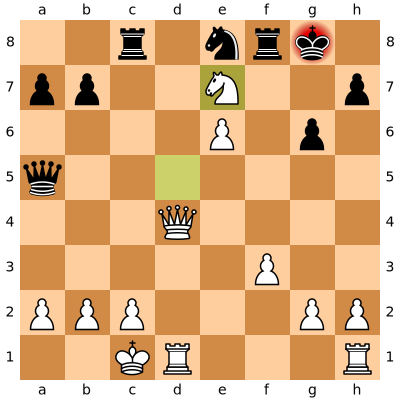

In [71]:
board

In [70]:
print(chess.Board('2r1nrk1/pp2N2p/4P1p1/q7/3Q4/5P2/PPP3PP/2KR3R b - - 0 18'))

. . r . n r k .
p p . . N . . p
. . . . P . p .
q . . . . . . .
. . . Q . . . .
. . . . . P . .
P P P . . . P P
. . K R . . . R


In [73]:
uni_str='2r1nrk1/pp2N2p/4P1p1/q7/3Q4/5P2/PPP3PP/2KR3R'


In [74]:
uni_str=uni_str.split('/')

In [75]:
uni_str

['2r1nrk1', 'pp2N2p', '4P1p1', 'q7', '3Q4', '5P2', 'PPP3PP', '2KR3R']

In [122]:
def uni_to_numpy(board):
    uni_str=str(board.unicode).split("'")[1].split(' ')[0]
    uni_str=uni_str.split('/')
    b=np.zeros(64).reshape(8,8)
    b=np.array([b,b])
    x=0
    y=0
    pdict={
        'P':[1,1],
        'p':[1,2],
        'N':[2,1],
        'n':[2,2],
        'B':[3,1],
        'b':[3,2],
        'R':[4,1],
        'r':[4,2],   
        'Q':[5,1],
        'q':[5,2],   
        'K':[6,1],
        'k':[6,2]
    }
    for i in uni_str:
        for j in i:
            try:
                j=int(j)
                x=x+j
            except ValueError:
                b[0,y,x]=pdict[j][0]
                b[1,y,x]=pdict[j][1]
                x=x+1
        y=y+1
        x=0
    return b
def getUnicode(board):
    return str(board.unicode).split("'")[1].split(' ')[0]

In [130]:
game_steps[1]

array([[[4., 2., 3., 5., 6., 3., 2., 4.],
        [1., 1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [4., 2., 3., 5., 6., 3., 2., 4.]],

       [[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 0., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]])

In [131]:
x=pd.read_csv('../chess/games.csv')

In [132]:
xn=np.asarray(x)

In [133]:
myx=xn[:,[5,6,9,11,12]]

In [134]:
myx=myx[np.where(myx[:,0]=='mate')]

In [135]:
x2=myx[np.where(myx[:,2:3]>=2000)[0]]

In [136]:
x2=x2[:,1:5]

In [139]:
x2[x2=='white']=0
x2[x2=='black']=1

In [142]:
x2=x2[:,[0,3]]

In [144]:
y=x2[:,0]
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [145]:
x_str=x2[:,1]
x_str

array(['e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Be3 Bg7 f3 O-O Qd2 Nc6 Bc4 Be6 Bxe6 Nxd4 Bxf7+ Rxf7 Bxd4 d5 e5 Ne8 e6 Rf8 O-O-O Bxd4 Qxd4 Qa5 Nxd5 Rc8 Nxe7#',
       'e4 d5 exd5 Qxd5 Qf3 Qe5+ Ne2 Nf6 d4 Qd5 Qxd5 Nxd5 a3 Nb6 Ng3 Nc6 Be3 e5 dxe5 Nxe5 Nd2 Be6 O-O-O Nbc4 Nxc4 Nxc4 Bxc4 Bxc4 Rhe1 Be7 Nf5 Be6 Nxg7+ Kf8 Bh6 Bg4 f3 Be6 Nxe6+ Ke8 Nxc7#',
       'd4 Nf6 Bf4 g6 e3 Bg7 Nf3 O-O Be2 d6 O-O Nh5 Bg5 h6 Bh4 c5 c3 Bf5 dxc5 dxc5 Qxd8 Rxd8 Bxe7 Rd5 Bc4 Rd7 Bxc5 Rc7 b4 Nd7 Nd4 Nxc5 Nxf5 gxf5 bxc5 Rxc5 Be2 Nf6 Bf3 Ne4 Bxe4 fxe4 Nd2 Re8 Rab1 b6 Rb4 Bxc3 Rxe4 Rxe4 Nxe4 Rc4 Rc1 Rxe4 Rxc3 Ra4 Rc2 Kf8 Kf1 Ke7 Ke2 Kd6 Kd2 Kd5 f3 Rc4 Rxc4 Kxc4 e4 Kd4 g3 a5 a4 Kc4 f4 Kb4 e5 Kxa4 f5 Kb3 e6 fxe6 fxe6 a4 e7 a3 e8=Q a2 Qe6+ Kb2 Qe5+ Kb1 Qe4+ Kb2 Qd4+ Kb1 Qxb6+ Ka1 Qf6+ Kb1 Qf5+ Ka1 Qe5+ Kb1 Qe4+ Ka1 Qd4+ Kb1 Qd3+ Ka1 Qc3+ Kb1 Qc2+ Ka1 Qc1#',
       'Nf3 d5 Nd4 e5 Nf3 e4 Ng1 Bc5 e3 Bf5 d4 Bd6 c4 dxc4 Nc3 Be6 d5 Bf5 Bxc4 Ne7 Qd4 c5 Qxg7 Rg8 Qh6 Rxg2 Nb5 Be5 Ne2 Bg7 Qh4 Ng6 Qh5 Bg4 Qxh7 Qf6 Nc7+ Kd8 Qg8+ Kxc

In [151]:
x=[]
ys=[]
for y,game in tqdm(x2):
    board=chess.Board()
    x.append(uni_to_numpy(board))
    ys.append(y)
    for i in game.split(' '):
        board.push_san(i)
        x.append(uni_to_numpy(board))
        ys.append(y)

100%|██████████| 319/319 [00:03<00:00, 94.36it/s] 


In [153]:
len(x)

22637

In [161]:
len(ys)

22637

In [156]:
import torch
from torch.utils.data import DataLoader

In [167]:
xt=torch.Tensor(x)
yt=torch.Tensor(ys)

In [159]:
dataset=torch.Tensor([xt,yt])

ValueError: only one element tensors can be converted to Python scalars

In [169]:
torch.save(xt,'../chess/xData.pt')
torch.save(yt,'../chess/yData.pt')

In [ ]:
torch.save(yt,'../chess/yData.pt')

In [168]:
yt

tensor([0., 0., 0.,  ..., 0., 0., 0.])